In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
%cd "/content/drive/MyDrive/epfl_ml_project/BP_LM"

/content/drive/MyDrive/epfl_ml_project/BP_LM


In [77]:
#Assume a folder named dataset exists in the same directory as the code repository
data_path = '../dataset'

#assume dataset itself is just named dataset.txt
df = pd.read_csv(os.path.join(data_path, "Data_GRCh38_canonical_transcript_intron_bp_database_Peng_20241113.txt"), delimiter = "\t")

### Basic Properties

Names of columns

In [78]:
df.columns.values

array(['CHR', 'START', 'END', 'STRAND', 'GENE', 'TRANSCRIPT', 'IVS',
       'IVS_SIZE', 'BP_POS', 'BP_ACC_DIST', 'BP_ACC_SEQ', 'IVS_SEQ'],
      dtype=object)

samples and features

In [79]:
print(df.shape)

(177980, 12)


### Abundance of different chromosomes in dataset

In [80]:
#Finding all chromosome types
chromosome_types = np.array([]).astype(str)
for i in range(len(df["CHR"])):
    if (chromosome_types == df["CHR"][i]).any() == False:
        chromosome_types = np.concatenate((chromosome_types, [df["CHR"][i]]))

In [81]:
#Finding their abundance
chromosome_abundance = []
for chrom_type in chromosome_types:
    number = np.sum((df["CHR"] == chrom_type))
    chromosome_abundance.append(number)

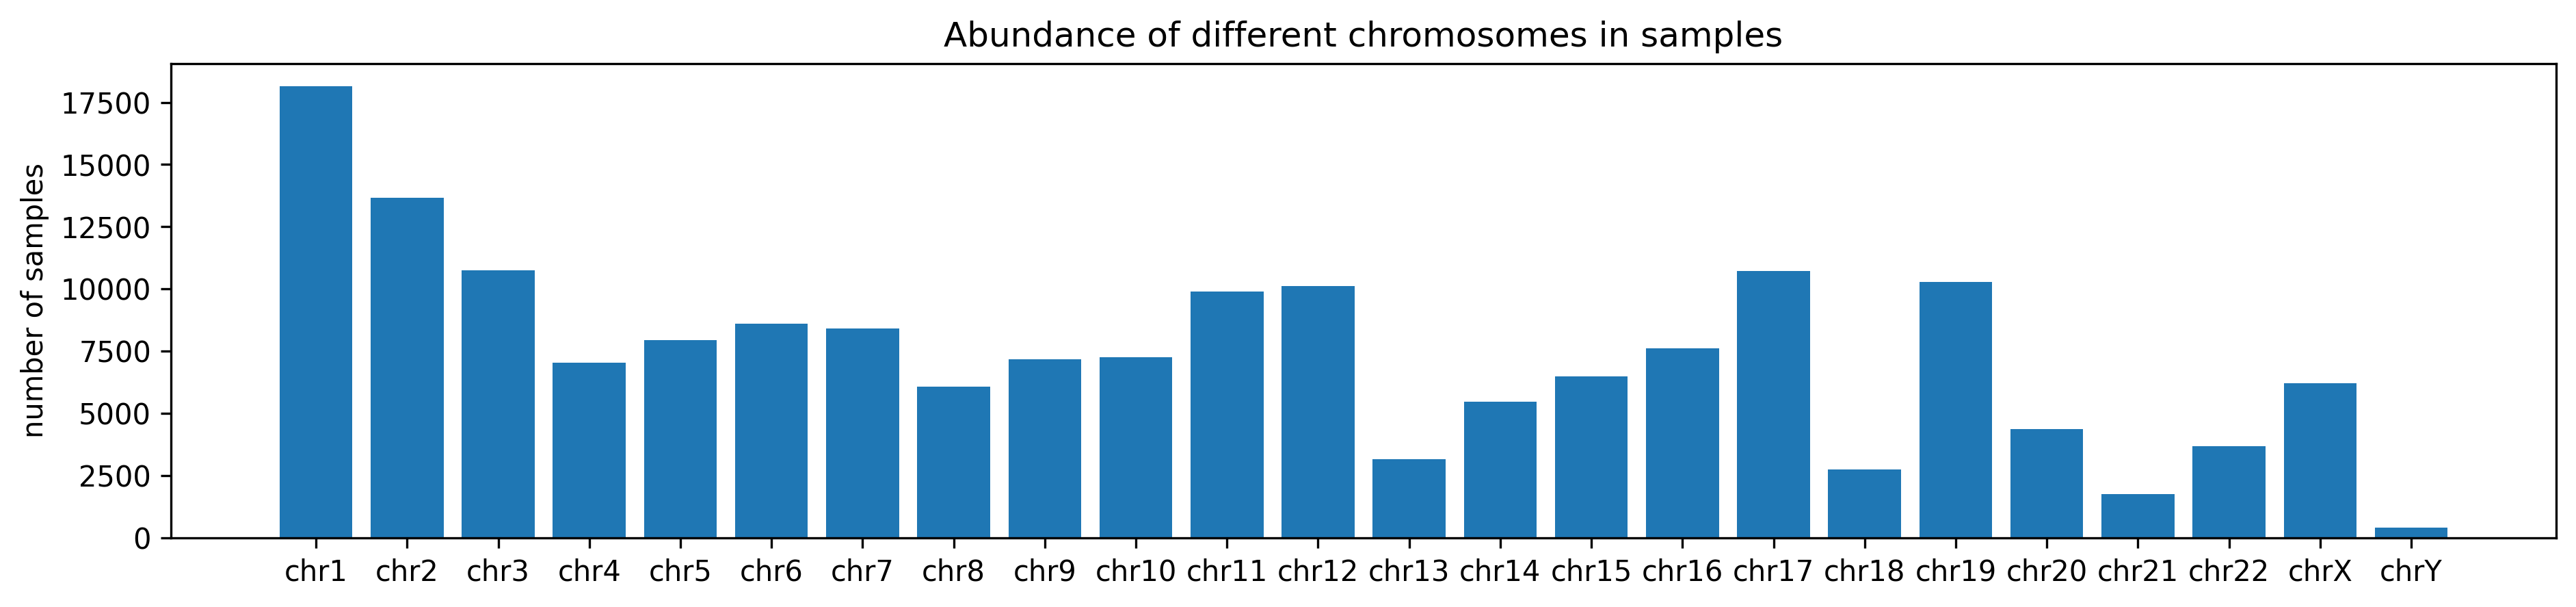

In [82]:
#plotting chromosome abundance
fig, ax = plt.subplots(figsize = (15,3), dpi = 300)
ax.bar(chromosome_types, chromosome_abundance)
ax.set_ylabel('number of samples')
ax.set_title('Abundance of different chromosomes in samples')
plt.show()

### Abundance of genes in dataset

In [83]:
#Finding all genes
gene_types = np.array([]).astype(str)
for i in range(len(df["GENE"])):
    if (gene_types == df["GENE"][i]).any() == False:
        gene_types = np.concatenate((gene_types, [df["GENE"][i]]))

In [84]:
#Finding relevant abundance of all genes
gene_abundance = []
for gene_type in gene_types:
    number = np.sum((df["GENE"] == gene_type))
    gene_abundance.append(number)

In [85]:
#20 most common genes
index = np.flip(np.argsort(gene_abundance))[:20]

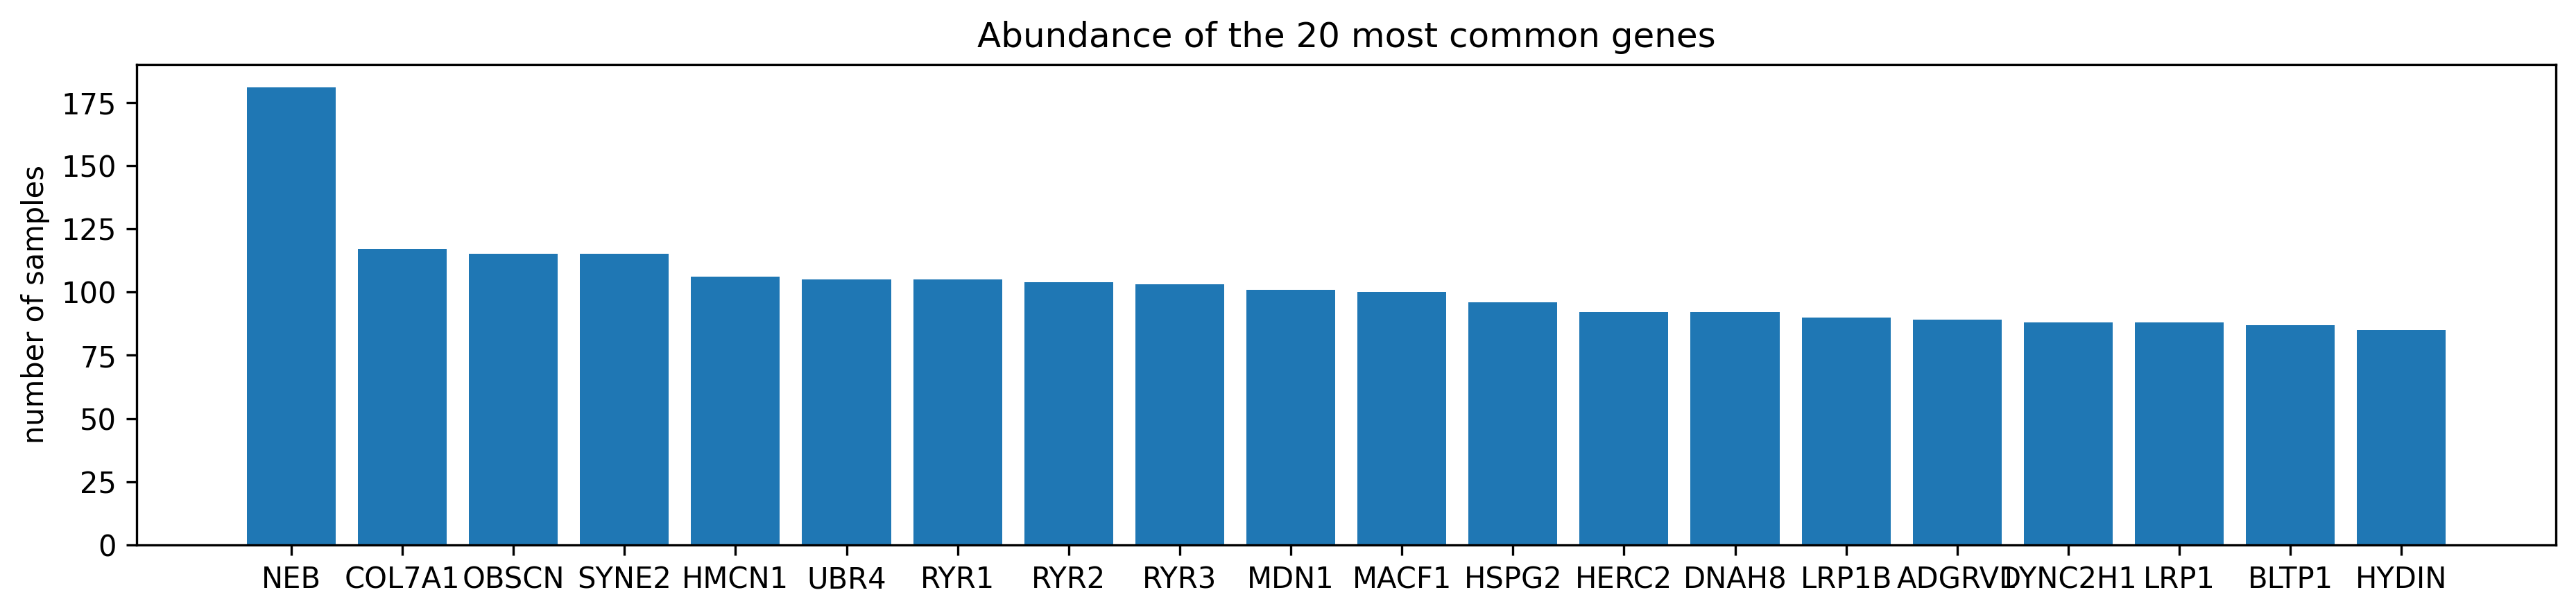

In [86]:
#Plot abundance of genes
fig, ax = plt.subplots(figsize = (15,3), dpi = 300)
ax.bar(gene_types[index], np.array(gene_abundance)[index])
ax.set_ylabel('number of samples')
ax.set_title('Abundance of the 20 most common genes')
plt.show()

### Check what kind of strands exist

In [87]:
#Finding all genes
strand_types = np.array([]).astype(str)
for i in range(len(df["STRAND"])):
    if (strand_types == df["STRAND"][i]).any() == False:
        strand_types = np.concatenate((strand_types, [df["STRAND"][i]]))

In [88]:
#Finding relevant abundance of all genes
strand_abundance = []
for strand_type in strand_types:
    number = np.sum((df["STRAND"] == strand_type))
    strand_abundance.append(number)

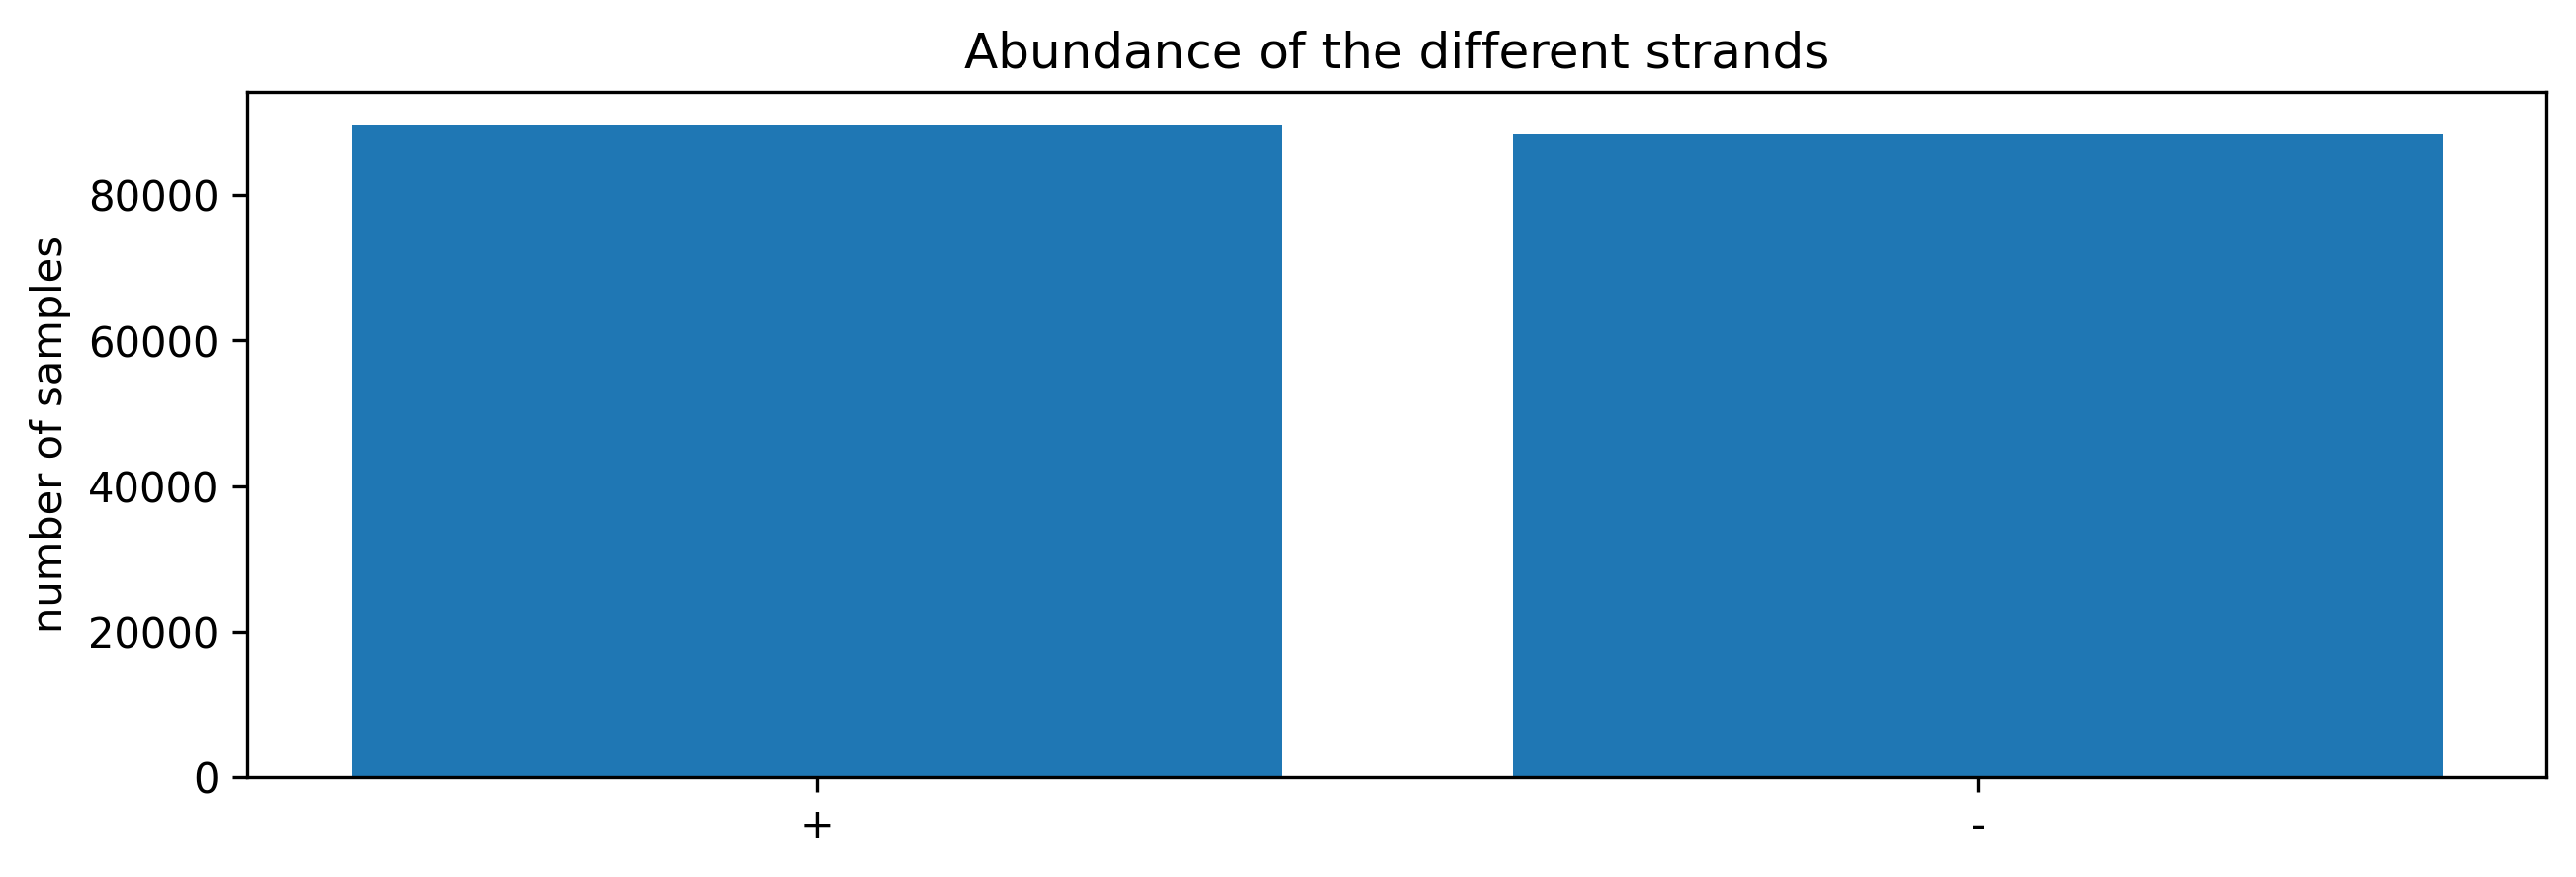

In [89]:
#Plot abundance of genes
fig, ax = plt.subplots(figsize = (10,3), dpi = 300)
ax.bar(strand_types, strand_abundance)
ax.set_ylabel('number of samples')
ax.set_title('Abundance of the different strands')
plt.show()

### Double check that start and stop matches size and sequence

In [90]:
df["END"]-df["START"]

,0
0,972
1,4140
2,701
3,4681
4,3142
...,...
177975,2853
177976,691
177977,6549
177978,93


In [91]:
df["IVS_SIZE"]

,IVS_SIZE
0,973
1,4141
2,702
3,4682
4,3143
...,...
177975,2854
177976,692
177977,6550
177978,94


In [92]:
len(df["IVS_SEQ"][0])

973

Checks out if both start and stop are inclusive

### Sequence lengths histogram

In [93]:
lengths = df["IVS_SIZE"].to_numpy()

In [94]:
minimum = np.min(lengths)
maximum = np.max(lengths)
avg = np.mean(lengths)

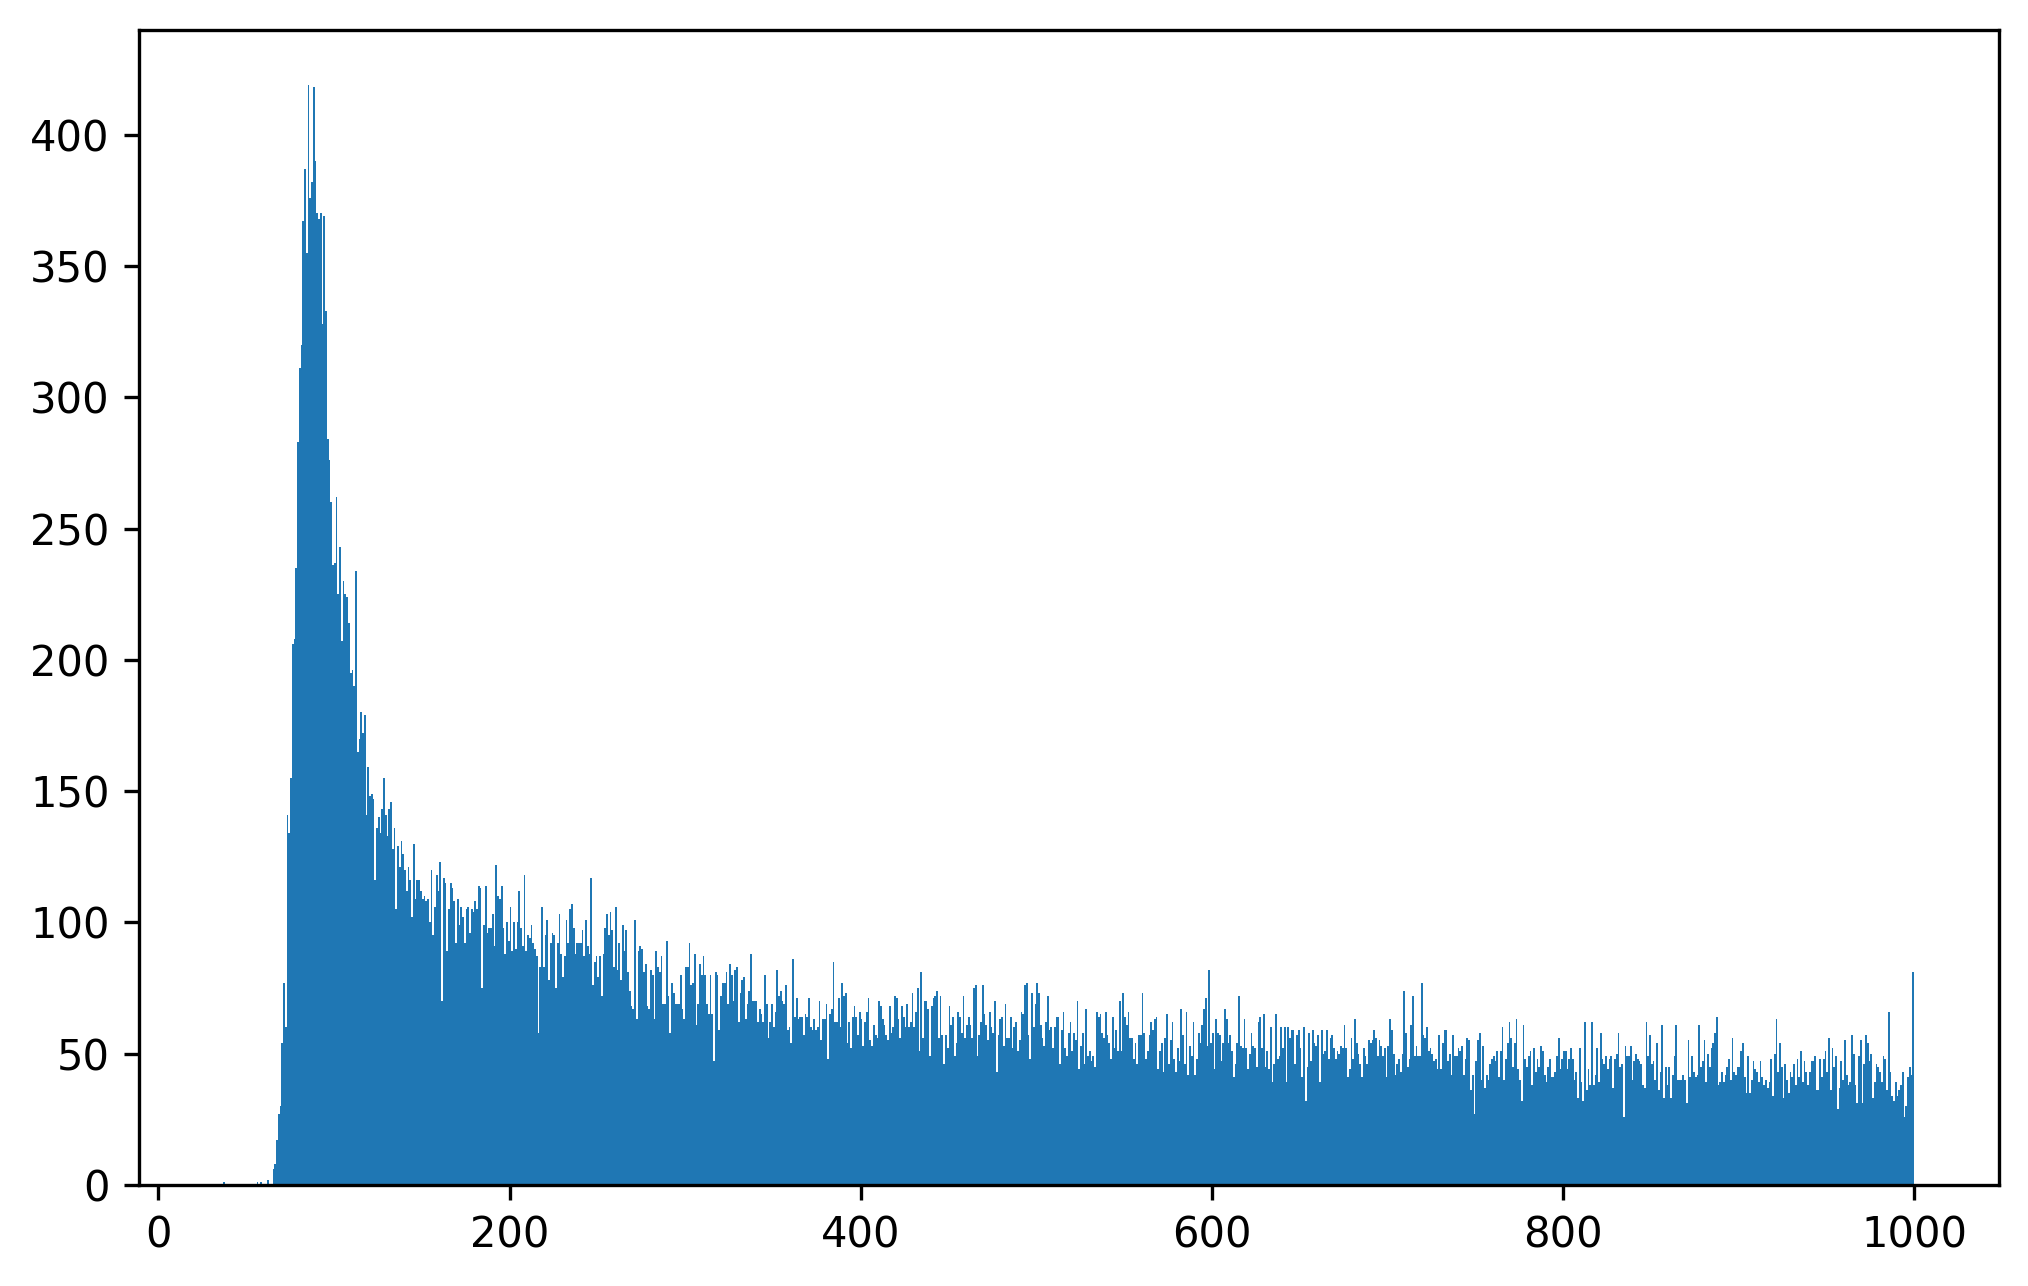

In [95]:
fig, ax = plt.subplots(figsize = (8,5), dpi = 300)
n, bins, patches = ax.hist(lengths, 1000-minimum, (minimum,1000))
fig.show()

In [96]:
minimum

37

In [97]:
maximum

1065861

In [98]:
avg

5861.703595909653

100 entries in each sequence is common, but distribution has an extremely long tail. Maximum length is of order million. Not sure how thats going to fit into the network.

### Branch point acid types

In [100]:
base_counts = {"A": 0, "C": 0, "T": 0, "G": 0}

for i, sequence in enumerate(df["IVS_SEQ"]):
    base = sequence[df["BP_POS"][i] - df["START"][i]]
    if base in base_counts:
        base_counts[base] += 1

As, Cs, Ts, Gs = base_counts["A"], base_counts["C"], base_counts["T"], base_counts["G"]

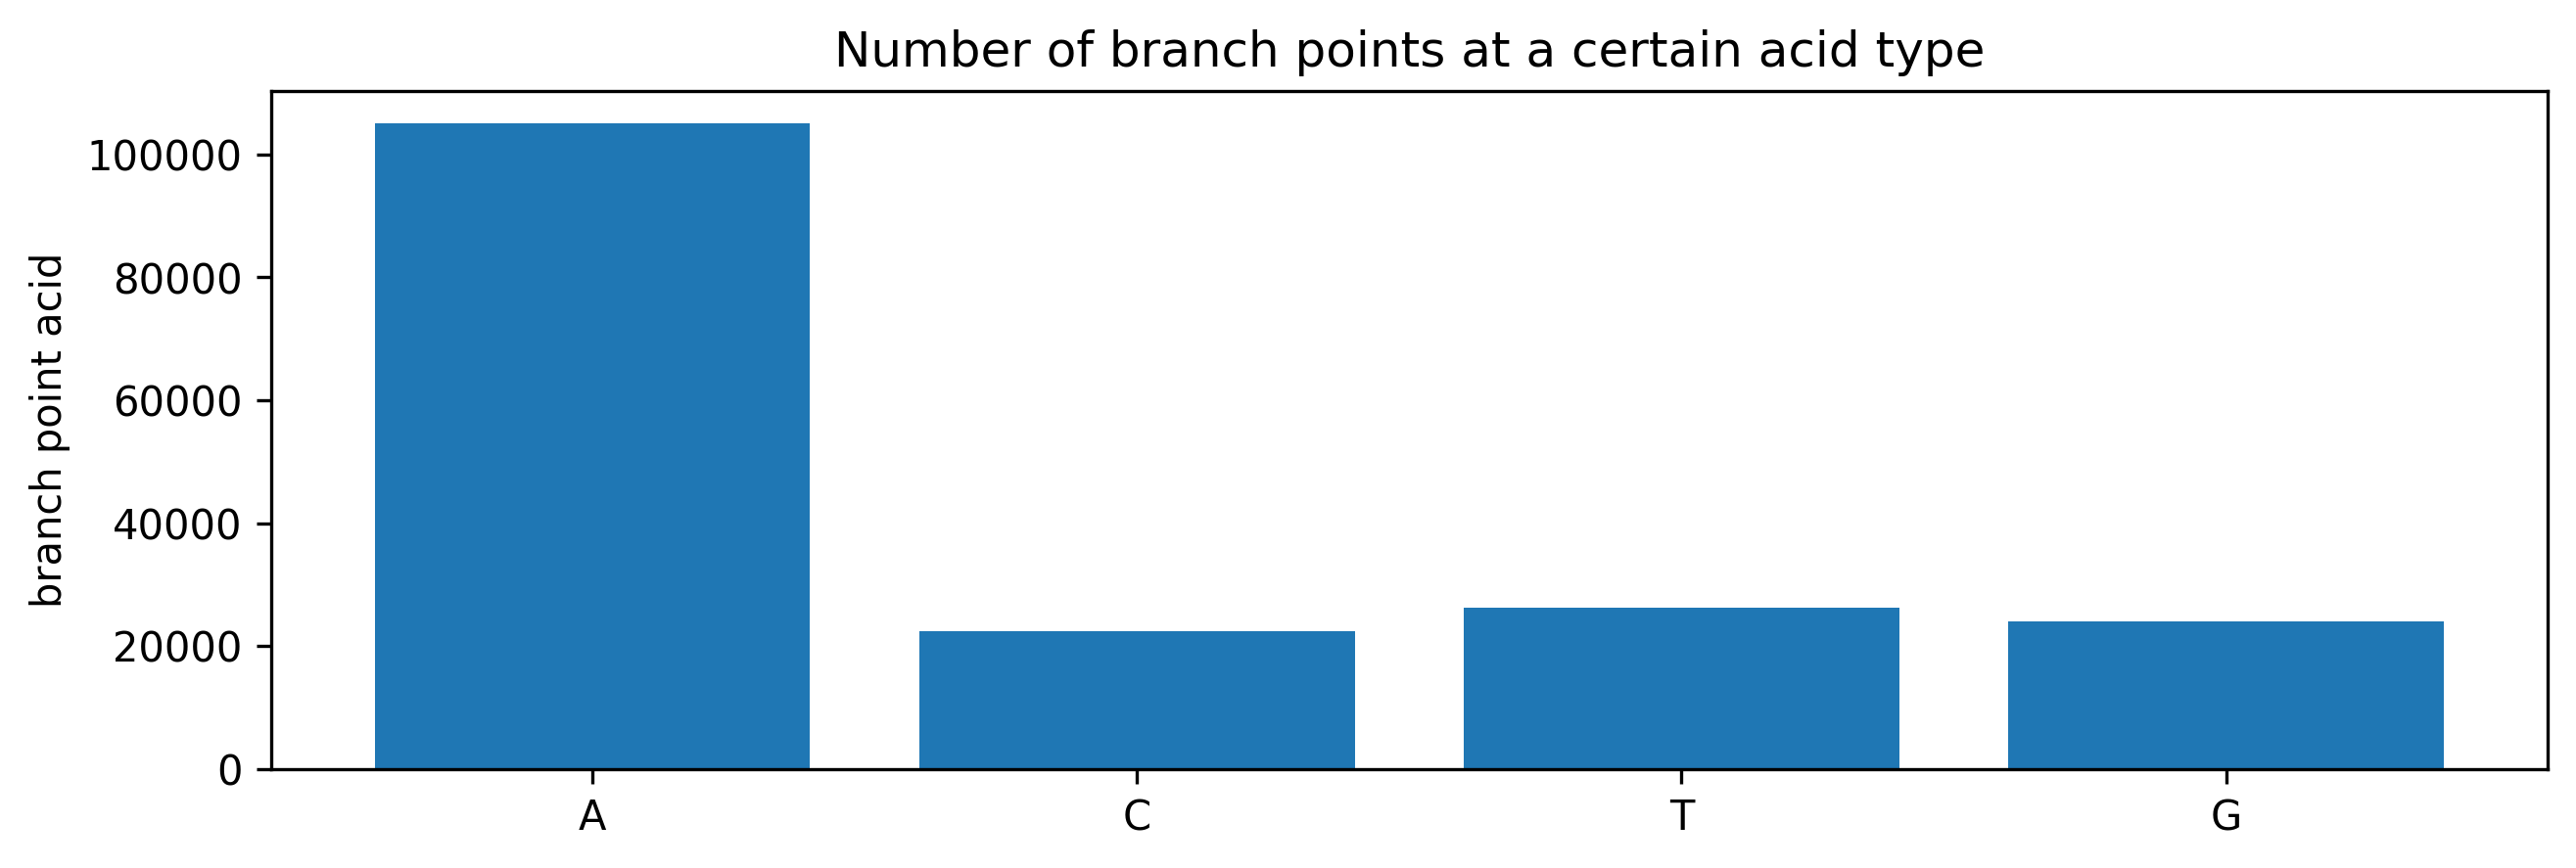

In [101]:
#Plot abundance of genes
fig, ax = plt.subplots(figsize = (10,3), dpi = 300)
ax.bar(["A", "C", "T", "G"], [As, Cs, Ts, Gs])
ax.set_ylabel('branch point acid')
ax.set_title('Number of branch points at a certain acid type')
plt.show()

# More Data Analysis, Exploring Effect of Strand Value on Branch Point Position


In [102]:
# Replace all the strand entries with 0 (negative) or 1 (positive)
df['STRAND'] = df['STRAND'].replace({'+': 1, '-': 0})

# Add a column for the BP position within the intron strand (IVS_SEQ), 0-indexed
df['BP_POS_WITHIN_STRAND'] = df['BP_POS'] - df['START']

print(df.shape)
print(f'Example row: \n {df.iloc[0]}\n')

(177980, 13)
Example row: 
 CHR                                                                  chr1
START                                                              924949
END                                                                925921
STRAND                                                                  1
GENE                                                               SAMD11
TRANSCRIPT                                                ENST00000616016
IVS                                                                  IVS1
IVS_SIZE                                                              973
BP_POS                                                             925894
BP_ACC_DIST                                                           -28
BP_ACC_SEQ                                   ACAGGGTCTGCCTCGGCTCTGCTCGCAG
IVS_SEQ                 GTGCCGCCGCCCCTCCCTTCGCTGCCGGGACCCGCGGGCCCCGACC...
BP_POS_WITHIN_STRAND                                                  945
Name: 0, d

<ipython-input-102-934d6c0823a8>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['STRAND'] = df['STRAND'].replace({'+': 1, '-': 0})


In [103]:
# Create a new column for the relative branch point position
df['BP_RELATIVE_POSITION'] = df['BP_POS_WITHIN_STRAND'] / df['IVS_SIZE']

# Display the updated DataFrame with the new column
print(df[['BP_POS_WITHIN_STRAND', 'IVS_SIZE', 'BP_RELATIVE_POSITION']].head())

   BP_POS_WITHIN_STRAND  IVS_SIZE  BP_RELATIVE_POSITION
0                   945       973              0.971223
1                  4136      4141              0.998793
2                   679       702              0.967236
3                  4657      4682              0.994660
4                  3128      3143              0.995227


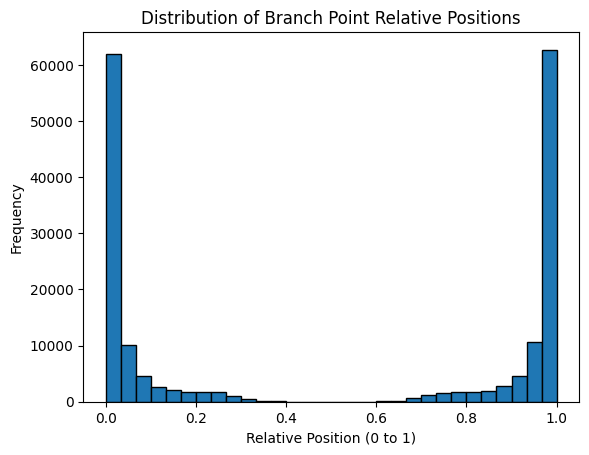

In [104]:
plt.hist(df['BP_RELATIVE_POSITION'], bins=30, edgecolor='k')
plt.title('Distribution of Branch Point Relative Positions')
plt.xlabel('Relative Position (0 to 1)')
plt.ylabel('Frequency')
plt.show()

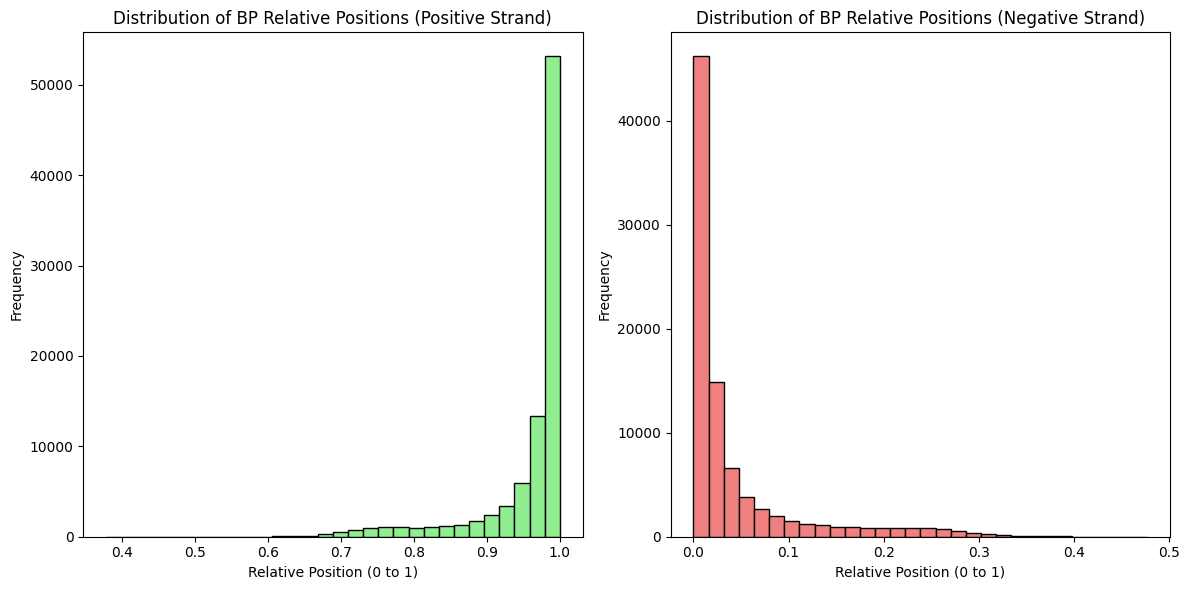

In [105]:
# Filter the DataFrame for positive and zero strands
positive_strands = df[df['STRAND'] == 1]
negative_strands = df[df['STRAND'] == 0]

# Plot for positive strands
plt.figure(figsize=(12, 6))

# Histogram for positive strands
plt.subplot(1, 2, 1)
plt.hist(positive_strands['BP_RELATIVE_POSITION'], bins=30, edgecolor='k', color='lightgreen')
plt.title('Distribution of BP Relative Positions (Positive Strand)')
plt.xlabel('Relative Position (0 to 1)')
plt.ylabel('Frequency')

# Histogram for negative strands
plt.subplot(1, 2, 2)
plt.hist(negative_strands['BP_RELATIVE_POSITION'], bins=30, edgecolor='k', color='lightcoral')
plt.title('Distribution of BP Relative Positions (Negative Strand)')
plt.xlabel('Relative Position (0 to 1)')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

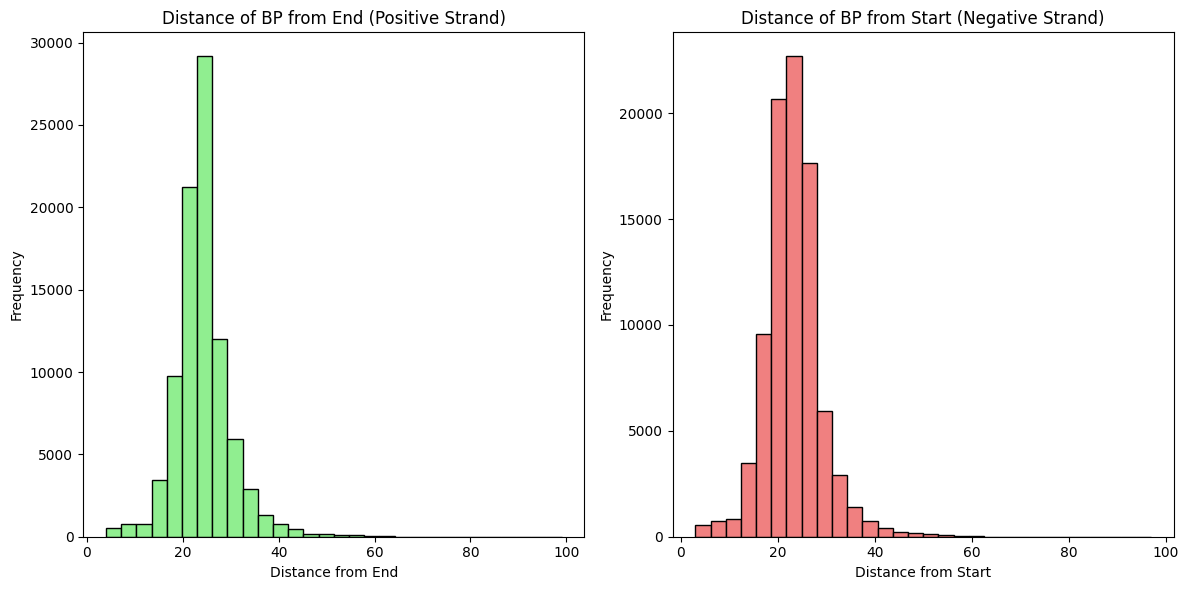

In [106]:
# Create a new column for the distance of BP from the end
df['BP_DISTANCE_FROM_END'] = df.apply(
    lambda row: row['IVS_SIZE'] - row['BP_POS_WITHIN_STRAND'] if row['STRAND'] == 1 else row['BP_POS_WITHIN_STRAND'],
    axis=1
)

# Filter the DataFrame for positive and negative strands
positive_strands = df[df['STRAND'] == 1]
negative_strands = df[df['STRAND'] == 0]

# Plot the distances for positive and negative strands
plt.figure(figsize=(12, 6))

# Histogram for positive strands (distance from end)
plt.subplot(1, 2, 1)
plt.hist(positive_strands['BP_DISTANCE_FROM_END'], bins=30, edgecolor='k', color='lightgreen')
plt.title('Distance of BP from End (Positive Strand)')
plt.xlabel('Distance from End')
plt.ylabel('Frequency')

# Histogram for negative strands (distance from start)
plt.subplot(1, 2, 2)
plt.hist(negative_strands['BP_DISTANCE_FROM_END'], bins=30, edgecolor='k', color='lightcoral')
plt.title('Distance of BP from Start (Negative Strand)')
plt.xlabel('Distance from Start')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()


In [107]:
# Use positive and negative strands to see if BP_ACC_DIST is still acurate
for i in range(1000):
    sample = positive_strands.iloc[i]
    assert sample['BP_POS_WITHIN_STRAND'] == sample['IVS_SIZE'] + sample['BP_ACC_DIST']

for i in range(1000):
    sample = negative_strands.iloc[i]
    assert sample['BP_POS_WITHIN_STRAND'] == -(1 + sample['BP_ACC_DIST'])

# NOTE: Not exactly sure why it's off by 1 for the positive case, but doesn't matter since we are not using this column

BP_ACC_DIST
Positive    177980
Name: count, dtype: int64


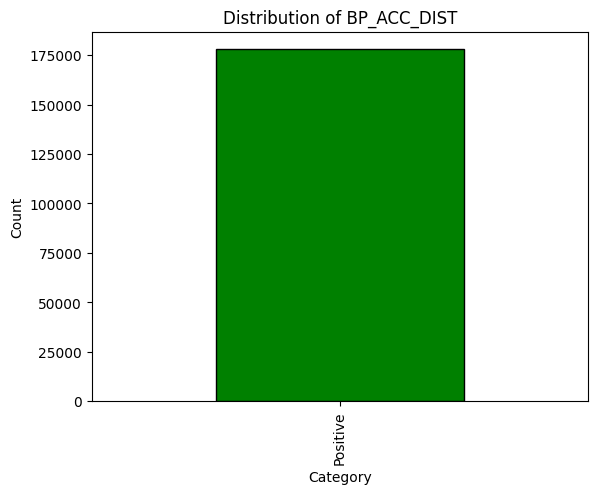

In [108]:
# Count positive, negative, and zero values in BP_ACC_DIST
bp_acc_dist_summary = df['BP_ACC_DIST'].apply(
    lambda x: 'Positive' if x < 0 else 'Zero'
).value_counts()

# Display the counts
print(bp_acc_dist_summary)

# Visualize the distribution
import matplotlib.pyplot as plt

bp_acc_dist_summary.plot(kind='bar', color=['green', 'red', 'blue'], edgecolor='k')
plt.title('Distribution of BP_ACC_DIST')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()